In [ ]:
! pip install kaggle

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=a0cb6a939bcdcb4140bd7f7abe23a31ece220d104a89309a35a2f4536d3235eb
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c higgs-boson

 98% 53.0M/54.3M [00:00<00:00, 76.3MB/s]
100% 54.3M/54.3M [00:01<00:00, 56.7MB/s]


In [ ]:
! unzip higgs-boson.zip
! unzip training.zip
! unzip test.zip

Archive:  higgs-boson.zip
  inflating: HiggsBosonCompetition_AMSMetric_rev1.py  
  inflating: random_submission.zip   
  inflating: test.zip                
  inflating: training.zip            
Archive:  training.zip
  inflating: training.csv            
Archive:  test.zip
  inflating: test.csv                


In [ ]:
! unzip random_submission.zip
sub = pd.read_csv("random_submission.csv")
sub.head()

Archive:  random_submission.zip
replace random_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: random_submission.csv   


,EventId,RankOrder,Class
0,350000,416957,b
1,350001,89624,b
2,350002,519845,b
3,350003,510885,s
4,350004,455944,s


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder,normalize,MinMaxScaler,StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
import seaborn as sns

In [ ]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")
test.head()



,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,1.536,-1.404,-999.000,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,1.777,-1.204,-999.000,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,1.096,-1.408,-999.000,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,0.819,-1.382,-999.000,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,1.713,-0.913,0.004,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder,normalize,MinMaxScaler,StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
import seaborn as sns

In [ ]:
x_vals = train["Label"].value_counts().index
y_vals = train["Label"].value_counts().values
print(x_vals)
print(y_vals)

Index(['b', 's'], dtype='object')
[164333  85667]


Text(0.5, 1.0, 'Number of background and signals in the training data')

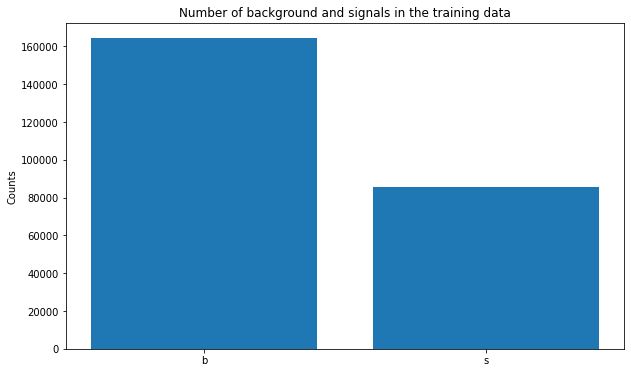

In [ ]:
plt.figure(figsize = (10, 6))
plt.bar(x_vals, y_vals)
plt.ylabel("Counts")
plt.title("Number of background and signals in the training data")

# Data Preprocessing
#Description of the features 
**Event Id**: An unique integer identifier of the event. Not to be used as a feature. \
**DER mass MMC**: The estimated mass $m_H$ of the Higgs boson candidate, obtained through a probabilistic phase space integration (may be undefined if the topology of the event is too far from the expected topology) \
**DER mass transverse met lep**: The transverse mass between the missing transverse energy and the lepton. \
**DER mass vis**: The invariant mass of the hadronic tau and the lepton.
**DER pt h**: The modulus of the vector sum of the transverse momentum of the hadronic tau,
the lepton, and the missing transverse energy vector.
DER deltaeta jet jet The absolute value of the pseudorapidity separation between the
two jets (undefined if PRI jet num ≤ 1). \
**DER mass jet jet**: The invariant mass of the two jets (undefined if PRI jet num ≤ 1).
**DER prodeta jet jet** The product of the pseudorapidities of the two jets (undefined if PRI jet num ≤
1).\
**DER deltar tau lep**: The R separation between the hadronic tau and the lepton.\
**DER pt tot**: The modulus of the vector sum of the missing transverse momenta and the
transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI jet num ≥ 1)
and the subleading jet (if PRI jet num = 2) (but not of any additional jets). \
**DER sum pt**: The sum of the moduli of the transverse momenta of the hadronic tau, the
lepton, the leading jet (if PRI jet num ≥ 1) and the subleading jet (if PRI jet num = 2)
and the other jets (if PRI jet num = 3). \
**DER pt ratio lep tau**: The ratio of the transverse momenta of the lepton and the hadronic
tau \
**DER met phi centrality **The centrality of the azimuthal angle of the missing transverse energy vector w.r.t. the hadronic tau and the lepton \

**What we have done for the data is if the values are undefined i.e., -999 here we have replaced it with the median of the data columns whose values is not - 999**

In [ ]:
train.loc[train.DER_mass_MMC<0,'DER_mass_MMC']=np.median(train.DER_mass_MMC[train.DER_mass_MMC>=0])

train.loc[train.PRI_jet_num<=1,'DER_deltaeta_jet_jet']=np.median(train.DER_deltaeta_jet_jet[train.PRI_jet_num>1])

train.loc[train.PRI_jet_num<=1,'DER_mass_jet_jet']=np.median(train.DER_mass_jet_jet[train.PRI_jet_num>1])

train.loc[train.PRI_jet_num<=1,'DER_prodeta_jet_jet']=np.median(train.DER_prodeta_jet_jet[train.PRI_jet_num>1])

train.loc[train.PRI_jet_num<1,'DER_pt_tot']=np.median(train.DER_pt_tot[train.PRI_jet_num>=1])

train.loc[train.PRI_jet_num<1,'DER_sum_pt']=np.median(train.DER_sum_pt[train.PRI_jet_num>=1])

train.loc[train.PRI_jet_num<=1,'DER_lep_eta_centrality']=np.median(train.DER_lep_eta_centrality[train.PRI_jet_num>1])

train.loc[train.PRI_jet_num==0,'PRI_jet_leading_pt']=np.median(train.PRI_jet_leading_pt[train.PRI_jet_num!=0])

train.loc[train.PRI_jet_num==0,'PRI_jet_leading_eta']=np.median(train.PRI_jet_leading_eta[train.PRI_jet_num!=0])

train.loc[train.PRI_jet_num==0,'PRI_jet_leading_phi']=np.median(train.PRI_jet_leading_phi[train.PRI_jet_num!=0])

train.loc[train.PRI_jet_num<=1,'PRI_jet_subleading_pt']=np.median(train.PRI_jet_subleading_pt[train.PRI_jet_num>1])

train.loc[train.PRI_jet_num<=1,'PRI_jet_subleading_eta']=np.median(train.PRI_jet_subleading_eta[train.PRI_jet_num>1])

train.loc[train.PRI_jet_num<=1,'PRI_jet_subleading_phi']=np.median(train.PRI_jet_subleading_phi[train.PRI_jet_num>1])

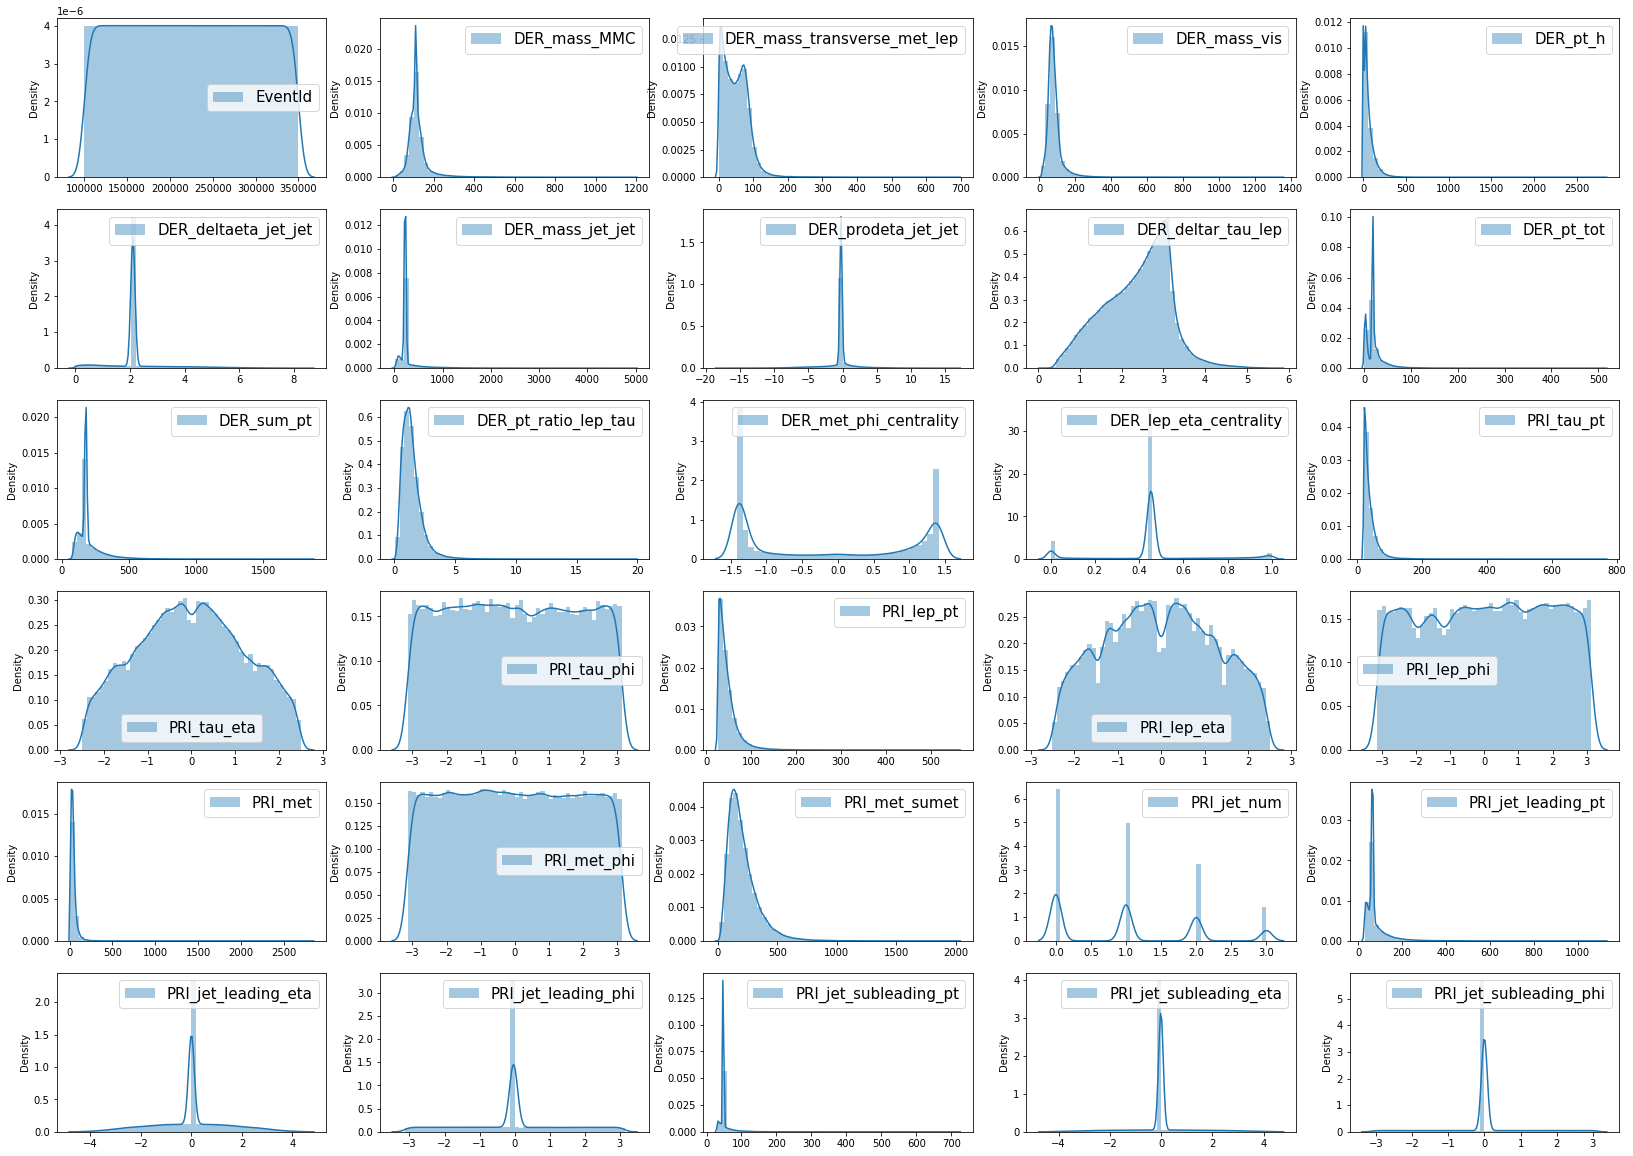

In [ ]:
plt.figure(figsize=(28,24))
for i in range(30):
    plt.subplot(7,5,i+1)
    sns.distplot(train[train.columns[i]].values, label=train.columns[i])
    plt.legend(fontsize=15)   
plt.show()

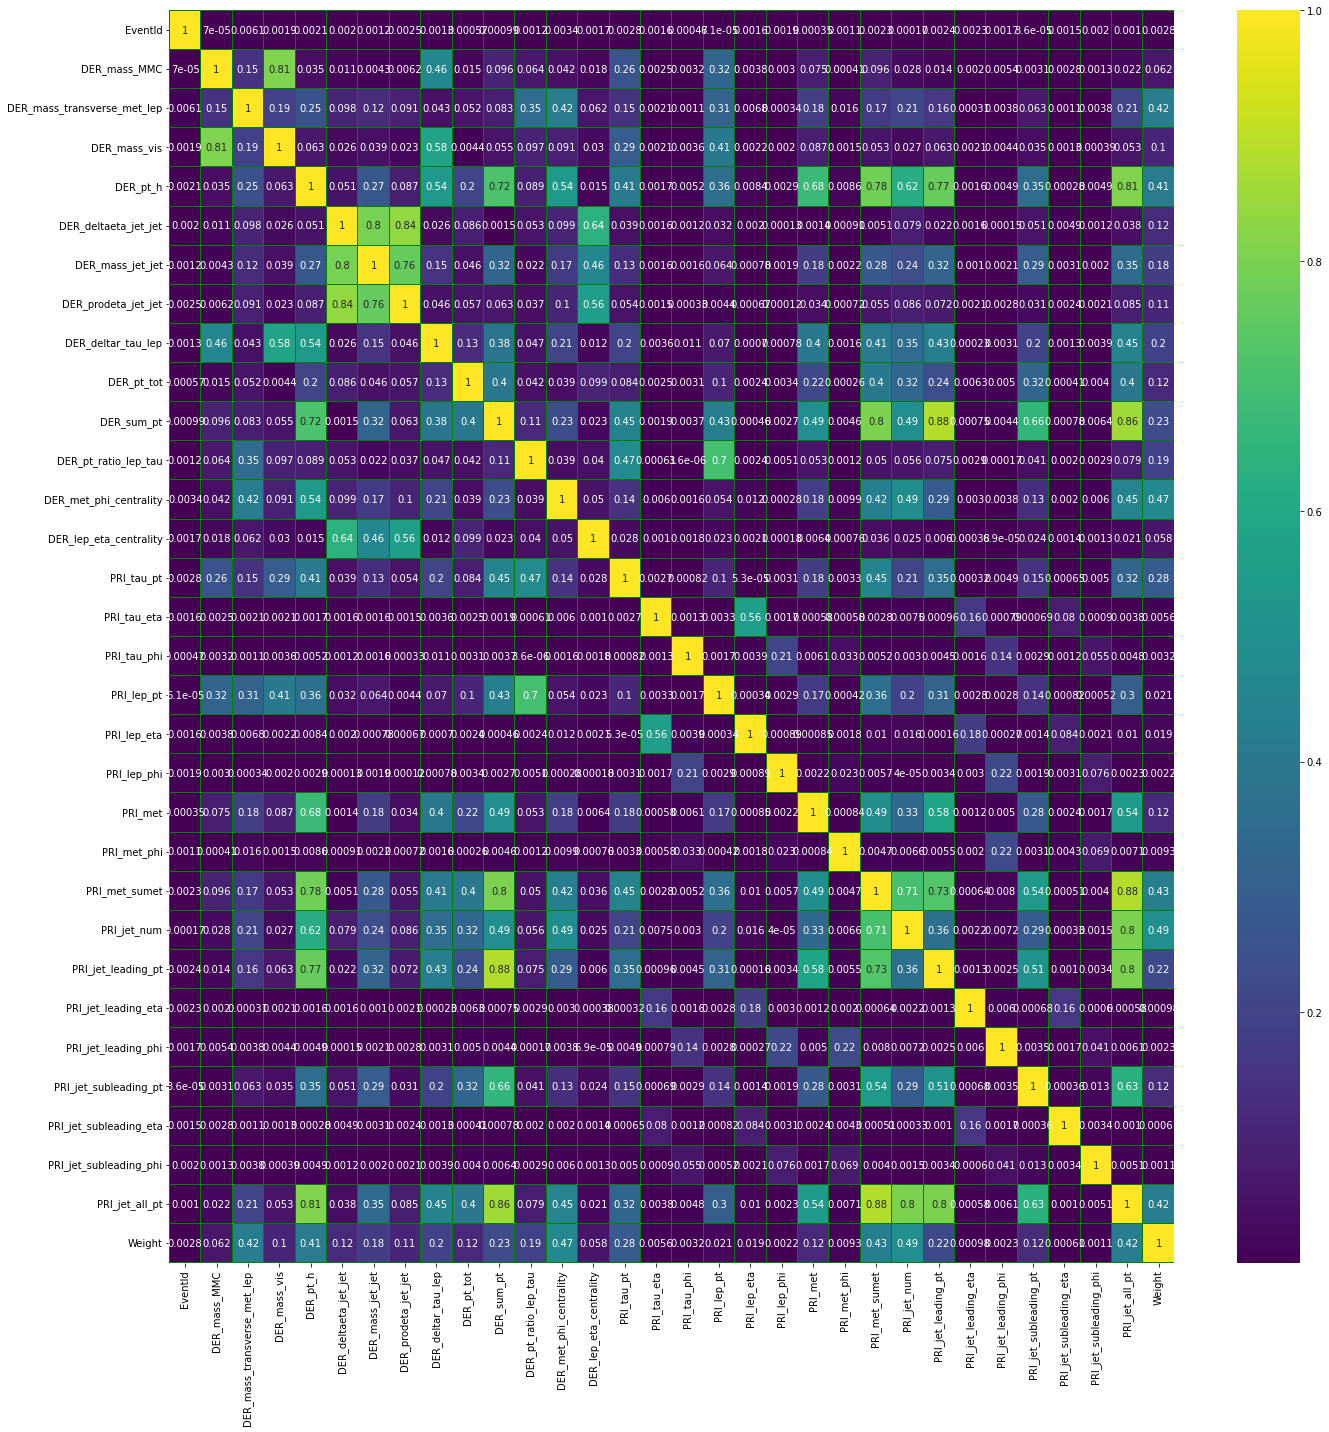

In [ ]:
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True

sns.heatmap(np.abs(train.corr()), cmap='viridis', linecolor='green', linewidth=0.01, annot=True)
plt.show()

In [ ]:
import collections
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, normalize
import math

In [ ]:
enc = LabelEncoder()
train["Label"] = enc.fit_transform(train["Label"])
train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,100001,160.937,68.768,103.235,48.146,2.107,225.885,-0.244,3.473,2.078,125.157,0.879,1.414,0.454,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,47.902,-0.01,-0.002,46.226,2.233584,0
2,100002,112.406,162.172,125.953,35.635,2.107,225.885,-0.244,3.148,9.336,197.814,3.776,1.414,0.454,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,47.902,-0.01,-0.002,44.251,2.347389,0
3,100003,143.905,81.417,80.943,0.414,2.107,225.885,-0.244,3.310,18.231,178.643,2.354,-1.285,0.454,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,-0.000,5.446378,0
4,100004,175.864,16.915,134.805,16.405,2.107,225.885,-0.244,3.891,18.231,178.643,1.056,-1.385,0.454,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.000,6.245333,0


In [ ]:
x=train.drop(["Label"],axis=1)
# Since 'EventId' is not a feature
x.set_index('EventId',inplace=True)
#x_test = test.set_index('EventId',inplace=True)
y=train['Label']
test.head()
x.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
EventId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653
100001,160.937,68.768,103.235,48.146,2.107,225.885,-0.244,3.473,2.078,125.157,0.879,1.414,0.454,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,47.902,-0.01,-0.002,46.226,2.233584
100002,112.406,162.172,125.953,35.635,2.107,225.885,-0.244,3.148,9.336,197.814,3.776,1.414,0.454,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,47.902,-0.01,-0.002,44.251,2.347389
100003,143.905,81.417,80.943,0.414,2.107,225.885,-0.244,3.310,18.231,178.643,2.354,-1.285,0.454,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,-0.000,5.446378
100004,175.864,16.915,134.805,16.405,2.107,225.885,-0.244,3.891,18.231,178.643,1.056,-1.385,0.454,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.000,6.245333


## Scaling:

In [ ]:
scalable_cols = ['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis','DER_pt_h','DER_mass_jet_jet','DER_pt_tot',
                'DER_sum_pt','PRI_tau_pt','PRI_lep_pt','PRI_met','PRI_met_sumet','PRI_jet_leading_pt','PRI_jet_subleading_pt'
                ,'PRI_jet_all_pt']
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(x[scalable_cols]), columns = scalable_cols)
#test_scaled = pd.DataFrame(scaler.transform(test[scalable_cols]), columns = scalable_cols)

for i in x.columns:
    if i not in scalable_cols:
        train_scaled[i] = x[i].values
        #test_scaled[i] = test[i].values

In [ ]:
x_train_w, x_val_w, y_train, y_val = train_test_split(train_scaled, y, train_size = 0.8, random_state = 44)
x_train_w.shape

(200000, 31)

In [ ]:
x_train = x_train_w.drop(["Weight"],axis = 1)
weights = x_val_w["Weight"].tolist()
x_val = x_val_w.drop(["Weight"], axis =1)
print(len(weights))
print(len(y_val))
print(x_train.shape)
print(x_val.shape)
print(len(y_val.values.tolist()))

50000
50000
(200000, 30)
(50000, 30)
50000


#Defining AMS

In [ ]:
# to get unnormalized true positive and false positive rates
import math
def evaluation(y, pred, weight):
    s = 0
    b = 0

    for i in range(len(weight)):
        if pred[i]== 1 and y[i]== 1:
            s += weight[i]
        if pred[i]== 1 and y[i]== 0:
            b += weight[i]

    
    # s, b, br=10

    br = 10

    AMS = math.sqrt(2*(((s+b+br)*math.log(1+s/(b+br)) - s)))
    return AMS

# Upsampling to make Balance dataset using SMOTE

In [ ]:
# Perform upsampling using SMOTE

# Define a SMOTE with random_state=2
sm = SMOTE(random_state = 2)

# Use the SMOTE object to upsample the train data
# You may have to use ravel() 
x_train_up, y_train_up = sm.fit_resample(x_train, y_train)

# Downsampling to make Balance data set using RandomUnderSampler

In [ ]:
# Define an RandomUnderSampler instance with random state as 2
rs = RandomUnderSampler(random_state = 2)


x_train_down, y_train_down = rs.fit_resample(x_train, y_train)

# Building the Base model as Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
def best_classifier(clf, params, X,y, n_folds = 5, scoring = "f1"):
    gs = GridSearchCV(clf, param_grid = params, cv=n_folds, scoring = "f1")
    gs.fit(X,y)
    print("BEST", gs.best_params_, round(gs.best_score_,2))
    best = gs.best_estimator_
    return best

In [ ]:
#Tuning for Logistic regression
logreg = LogisticRegression(solver= 'lbfgs', max_iter=100, random_state = 44)
c_values = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

#Finding the best value of C
best = best_classifier(logreg, c_values,x_train, y_train, n_folds = 5, scoring = "f1")

BEST {'C': 10} 0.59


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(max_iter=100,solver = 'lbfgs',C=10, random_state = 44)

logreg.fit(x_train, y_train)

y_pred_logreg = logreg.predict(x_val)
cm_test_logreg = confusion_matrix(y_val, y_pred_logreg)
acc_logreg = accuracy_score(y_val, y_pred_logreg)


f_score_logreg = f1_score(y_val, y_pred_logreg)

recall_logreg = (cm_test_logreg[1][1])/cm_test_logreg.sum(axis=1)[1]

print(f'Accuracy for test set for Logistic Regression = {acc_logreg:.4f}')
print(f'Accuracy for TPR/recall for Logistic Regression for test = {recall_logreg:.4f}')
print(f'F1 score : {f_score_logreg:.4f} ')
#print(f'Accuracy for test set for Logistic Regression = {(cm_test[0][0] + cm_test[1][1])/len(y_test):.2f}')

Accuracy for test set for Logistic Regression = 0.7403
Accuracy for TPR/recall for Logistic Regression for test = 0.5160
F1 score : 0.5776 


In [ ]:
y_val_i = y_val.values.tolist()
ams_logreg = evaluation(y_val_i, y_pred_logreg, weights)
print(f"The AMS value from Logistic Regression: {ams_logreg}")

The AMS value from Logistic Regression: 0.784609911457075


Text(0.5, 1.0, 'Bar plot of Importances for Logistic Regression Model')

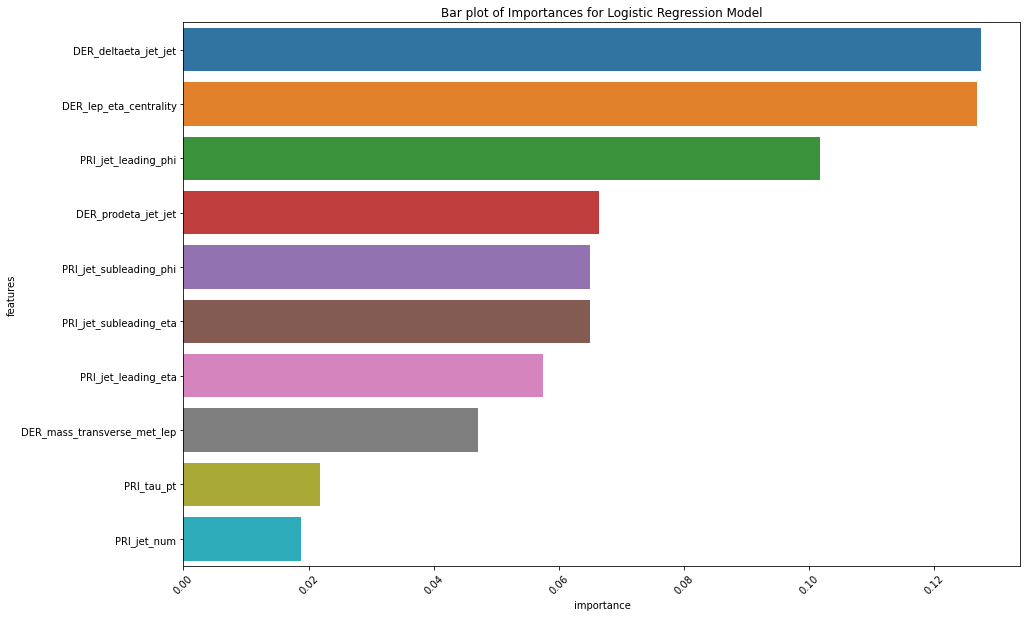

In [ ]:
def permutation_imp(model, imp_features, imp, impstd = 0):
    return pd.DataFrame({'features':imp_features, 'importance':imp, 'importance_std': impstd}
                       ).sort_values('importance', ascending=False)
features_imp =permutation_importance(logreg, x_val, y_val)
imp_feature_df = permutation_imp(logreg,list(x_train.columns),features_imp['importances_mean'],features_imp['importances_std']).iloc[:10]
fig,ax=plt.subplots(figsize=(15,10))
sns.barplot(data=imp_feature_df,y='features',x='importance',label='Logistic_Regression_importances',ax=ax)
plt.xticks(rotation='45')
plt.title("Bar plot of Importances for Logistic Regression Model")

# With Upsampled data

In [ ]:
logreg_up = LogisticRegression(solver= 'lbfgs', max_iter=100, random_state = 44)
c_values = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}


#Finding the best value of C
best = best_classifier(logreg_up, c_values,x_train_up, y_train_up, n_folds = 5, scoring = "f1")

BEST {'C': 0.01} 0.76


In [ ]:
logreg_up = LogisticRegression(max_iter=100,solver = 'lbfgs',C=0.01, random_state = 44)

logreg_up.fit(x_train_up, y_train_up)

y_pred_logreg_up = logreg_up.predict(x_val)
cm_test_logreg_up = confusion_matrix(y_val, y_pred_logreg_up)


f_score_logreg_up = f1_score(y_val, y_pred_logreg_up)

recall_logreg_up = (cm_test_logreg_up[1][1])/cm_test_logreg_up.sum(axis=1)[1]

print(f'Accuracy for test set for Logistic Regression for upsampled data= {(cm_test_logreg_up[0][0] + cm_test_logreg_up[1][1])/len(y_val):.4f}')
print(f'Accuracy for TPR/recall for Logistic Regression for upsampled data = {recall_logreg_up:.2f}')
print(f'F1 score : {f_score_logreg_up} ')



Accuracy for test set for Logistic Regression for upsampled data= 0.7283
Accuracy for TPR/recall for Logistic Regression for upsampled data = 0.76
F1 score : 0.6569184534181882 


In [ ]:
y_val_i = y_val.values.tolist()
ams_logreg_up = evaluation(y_val_i, y_pred_logreg_up, weights)
print(f"The AMS value from Logistic Regression for Up Sampled data: {ams_logreg_up}")

The AMS value from Logistic Regression for Up Sampled data: 0.8365716020578421


Text(0.5, 1.0, 'Bar plot of Importances for Logistic Regression  Model for Upsampled data')

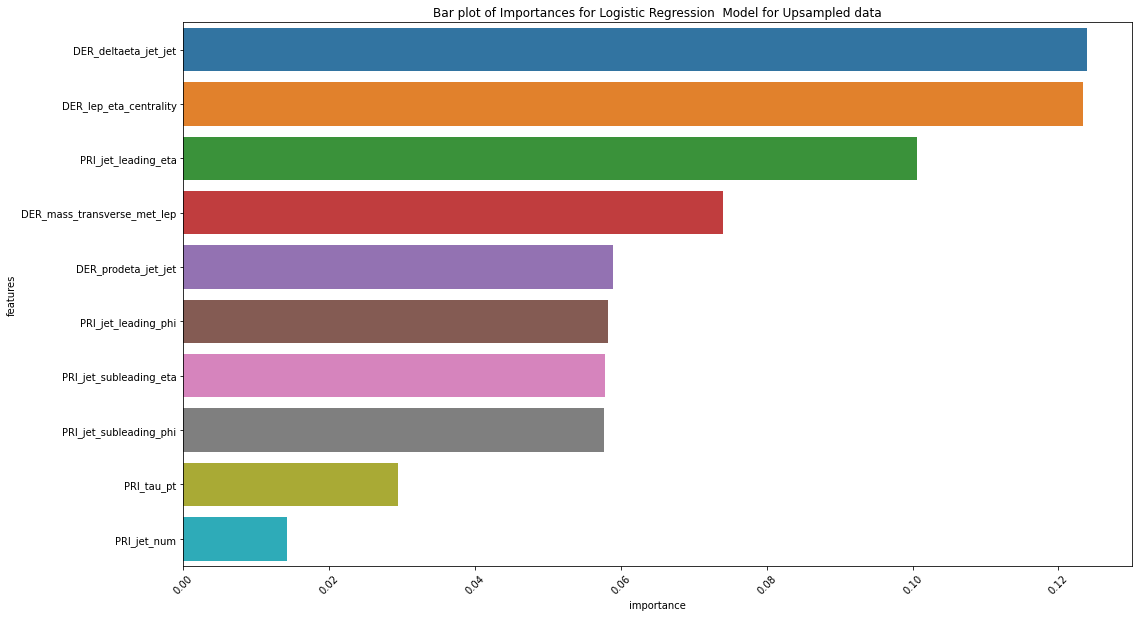

In [ ]:
def permutation_imp(model, imp_features, imp, impstd = 0):
    return pd.DataFrame({'features':imp_features, 'importance':imp, 'importance_std': impstd}
                       ).sort_values('importance', ascending=False)
features_imp =permutation_importance(logreg_up, x_val, y_val)
imp_feature_df = permutation_imp(logreg_up,list(x_train.columns),features_imp['importances_mean'],features_imp['importances_std']).iloc[:10]
fig,ax=plt.subplots(figsize=(17,10))
sns.barplot(data=imp_feature_df,y='features',x='importance',label='Logistic_Regression_importances',ax=ax)
plt.xticks(rotation='45')
plt.title("Bar plot of Importances for Logistic Regression  Model for Upsampled data")

# For Undersampled data

In [ ]:
logreg_down = LogisticRegression(solver= 'lbfgs', max_iter=100, random_state = 44)
c_values = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

#Finding the best value of C
best = best_classifier(logreg_down, c_values,x_train_down, y_train_down, n_folds = 5, scoring = "f1")

BEST {'C': 10} 0.75


In [ ]:
logreg_down = LogisticRegression(max_iter=10000,solver = 'lbfgs',C=10, random_state = 44)

logreg_down.fit(x_train_down, y_train_down)

y_pred_logreg_down = logreg_down.predict(x_val)
cm_test_logreg_down = confusion_matrix(y_val, y_pred_logreg_down)
f_score_logreg_down = f1_score(y_val, y_pred_logreg_down)

recall_logreg_down = (cm_test_logreg_down[1][1])/cm_test_logreg_down.sum(axis=1)[1]

print(f'Accuracy for test set for Logistic Regression for undersampled data= {(cm_test_logreg_down[0][0] + cm_test_logreg_down[1][1])/len(y_val):.4f}')
print(f'Accuracy for TPR/recall for Logistic Regression for undersampled data = {recall_logreg_down:.4f}')
print(f'F1 score : {f_score_logreg_down:.4f} ')

Accuracy for test set for Logistic Regression for undersampled data= 0.7372
Accuracy for TPR/recall for Logistic Regression for undersampled data = 0.7702
F1 score : 0.6685 


In [ ]:
y_val_i = y_val.values.tolist()
ams_logreg_down = evaluation(y_val_i, y_pred_logreg_down, weights)
print(f"The AMS value for Logistic Regression for Under Sampled data: {ams_logreg_down}")

The AMS value for Logistic Regression for Under Sampled data: 0.8900526838688215


Text(0.5, 1.0, 'Bar plot of Importances for Logistic Regression  Model for Under sampled data')

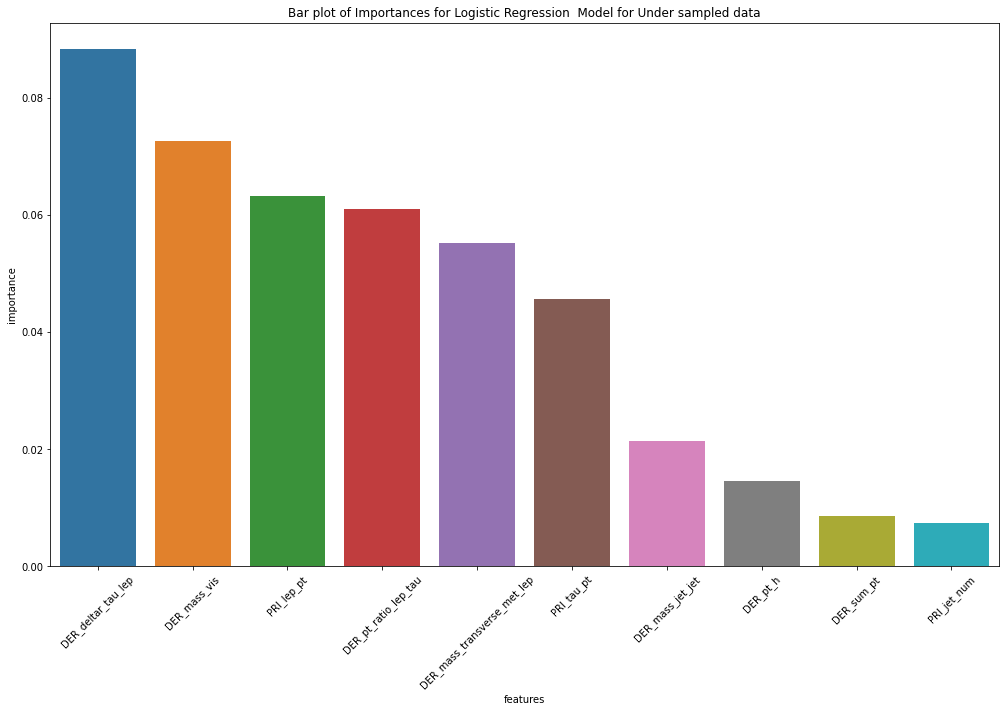

In [ ]:
def permutation_imp(model, imp_features, imp, impstd = 0):
    return pd.DataFrame({'features':imp_features, 'importance':imp, 'importance_std': impstd}
                       ).sort_values('importance', ascending=False)
features_imp =permutation_importance(logreg_down, x_val, y_val)
imp_feature_df = permutation_imp(logreg_down,list(x_train.columns),features_imp['importances_mean'],features_imp['importances_std']).iloc[:10]
fig,ax=plt.subplots(figsize=(17,10))
sns.barplot(data=imp_feature_df,x='features',y='importance',label='Logistic_Regression_importances',ax=ax)
plt.xticks(rotation='45')
plt.title("Bar plot of Importances for Logistic Regression  Model for Under sampled data")

#Decision Tree as the Base Model
1. For the Unbalanced Data

In [ ]:
dt = DecisionTreeClassifier(random_state = 44)
parameters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
param_grid = { 'criterion':['gini'],'max_depth': parameters, 'min_samples_leaf': [3, 4, 5, 6, 7]}
best = best_classifier(dt, param_grid, x_train, y_train, n_folds = 5, scoring = "f1")
print(best)

BEST {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6} 0.73
DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, random_state=44)


In [ ]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 6,  random_state = 44)

dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_val)
cm_test_dt = confusion_matrix(y_val, y_pred_dt)

f_score_dt = f1_score(y_val, y_pred_dt)

recall_dt = (cm_test_dt[1][1])/cm_test_dt.sum(axis=1)[1]

print(f'Accuracy for test set for Decision Tree Classifier= {(cm_test_dt[0][0] + cm_test_dt[1][1])/len(y_val):.4f}')
print(f'Accuracy for TPR/recall for Decision Tree Classifier = {recall_dt:.4f}')
print(f'F1 score : {f_score_dt:.4f} ')

Accuracy for test set for Decision Tree Classifier= 0.8224
Accuracy for TPR/recall for Decision Tree Classifier = 0.7033
F1 score : 0.7316 


In [ ]:
y_val_i = y_val.values.tolist()
ams_dt = evaluation(y_val_i, y_pred_dt, weights)
print(f"The AMS value for Decision Tree Classifier: {ams_dt}")

The AMS value for Decision Tree Classifier: 1.1571885135537332


Text(0.5, 1.0, 'Bar plot of Importances for Decision Tree Model')

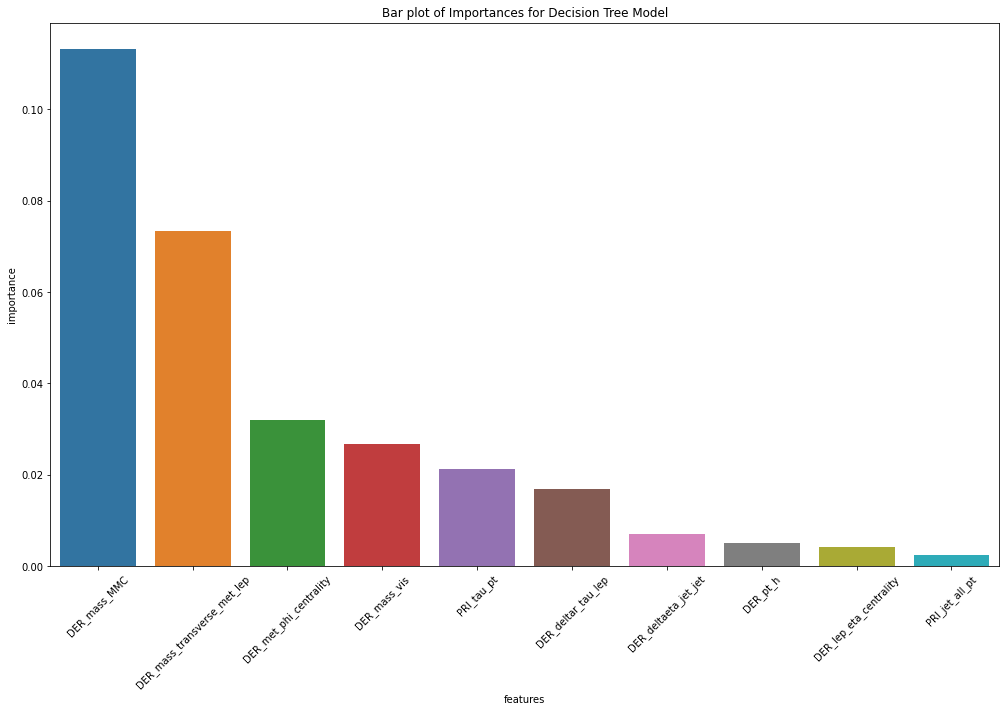

In [ ]:
def permutation_imp(model, imp_features, imp, impstd = 0):
    return pd.DataFrame({'features':imp_features, 'importance':imp, 'importance_std': impstd}
                       ).sort_values('importance', ascending=False)
features_imp =permutation_importance(dt, x_val, y_val)
imp_feature_df = permutation_imp(dt,list(x_train.columns),features_imp['importances_mean'],features_imp['importances_std']).iloc[:10]
fig,ax=plt.subplots(figsize=(17,10))
sns.barplot(data=imp_feature_df,x='features',y='importance',label='Decision tree importance',ax=ax)
plt.xticks(rotation='45')
plt.title("Bar plot of Importances for Decision Tree Model")

#For upsampled data

In [ ]:
dt_up = DecisionTreeClassifier(random_state = 44)
parameters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
param_grid = { 'criterion':['gini'],'max_depth': parameters, 'min_samples_leaf': [3, 4, 5, 6, 7]}
best = best_classifier(dt_up, param_grid,x_train_up, y_train_up, n_folds = 5, scoring = "f1")
print(best)

BEST {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4} 0.82
DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=44)


In [ ]:
dt_up = DecisionTreeClassifier(criterion = 'gini', max_depth = 10 , min_samples_leaf = 4,  random_state = 44)

dt_up.fit(x_train_up, y_train_up)

y_pred_dt_up = dt_up.predict(x_val)
cm_test_dt_up = confusion_matrix(y_val, y_pred_dt_up)

f_score_dt_up = f1_score(y_val, y_pred_dt_up)

recall_dt_up = (cm_test_dt_up[1][1])/cm_test_dt_up.sum(axis=1)[1]

print(f'Accuracy for test set for Decision Tree Classifier for up sampled data= {(cm_test_dt_up[0][0] + cm_test_dt_up[1][1])/len(y_val):.4f}')
print(f'Accuracy for TPR/recall for Decision Tree Classifier for up sampled data = {recall_dt_up:.4f}')
print(f'F1 score for upsampled data : {f_score_dt_up:.4f} ')

Accuracy for test set for Decision Tree Classifier for up sampled data= 0.8091
Accuracy for TPR/recall for Decision Tree Classifier for up sampled data = 0.8003
F1 score for upsampled data : 0.7426 


In [ ]:
y_val_i = y_val.values.tolist()
ams_dt_up = evaluation(y_val_i, y_pred_dt_up, weights)
print(f"The AMS value for Decision Tree for Upsampled data: {ams_dt_up}")

The AMS value for Decision Tree for Upsampled data: 1.034180798581718


Text(0.5, 1.0, 'Bar plot of Importances for Decision Tree Model for upsampled data')

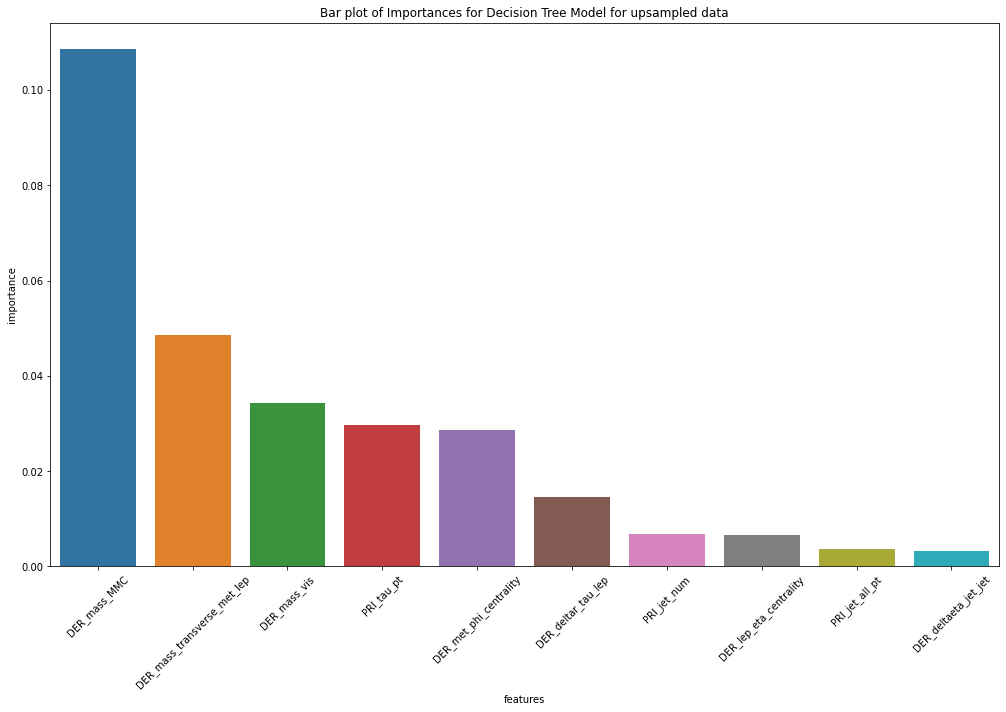

In [ ]:
def permutation_imp(model, imp_features, imp, impstd = 0):
    return pd.DataFrame({'features':imp_features, 'importance':imp, 'importance_std': impstd}
                       ).sort_values('importance', ascending=False)
features_imp =permutation_importance(dt_up, x_val, y_val)
imp_feature_df = permutation_imp(dt_up,list(x_train.columns),features_imp['importances_mean'],features_imp['importances_std']).iloc[:10]
fig,ax=plt.subplots(figsize=(17,10))
sns.barplot(data=imp_feature_df,x='features',y='importance',label='Decision tree importance',ax=ax)
plt.xticks(rotation='45')
plt.title("Bar plot of Importances for Decision Tree Model for upsampled data")

# For undersampled data

In [ ]:
dt_down = DecisionTreeClassifier(random_state = 44)
parameters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
param_grid = { 'criterion':['gini'],'max_depth': parameters, 'min_samples_leaf': [3, 4, 5, 6, 7]}
best = best_classifier(dt_down, param_grid,x_train_down, y_train_down, n_folds = 5, scoring = "f1")
print(best)

BEST {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 5} 0.8
DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, random_state=44)


In [ ]:
dt_down = DecisionTreeClassifier(criterion = 'gini', max_depth = 9 , min_samples_leaf = 5,  random_state = 44)

dt_down.fit(x_train_down, y_train_down)

y_pred_dt_down = dt_down.predict(x_val)
cm_test_dt_down = confusion_matrix(y_val, y_pred_dt_down)

f_score_dt_down = f1_score(y_val, y_pred_dt_down)

recall_dt_down = (cm_test_dt_down[1][1])/cm_test_dt_down.sum(axis=1)[1]

print(f'Accuracy for test set for Decision Tree Classifier for down sampled data= {(cm_test_dt_down[0][0] + cm_test_dt_down[1][1])/len(y_val):.4f}')
print(f'Accuracy for TPR/recall for Decision Tree Classifier for down sampled data = {recall_dt_down:.4f}')
print(f'F1 score for down sampled data : {f_score_dt_down:.4f} ')

Accuracy for test set for Decision Tree Classifier for down sampled data= 0.8053
Accuracy for TPR/recall for Decision Tree Classifier for down sampled data = 0.8076
F1 score for down sampled data : 0.7405 


In [ ]:
y_val_i = y_val.values.tolist()
ams_dt_down = evaluation(y_val_i, y_pred_dt_down, weights)
print(f"The AMS value from Decision Tree for Under Sampled data: {ams_dt_down}")

The AMS value from Decision Tree for Under Sampled data: 1.018097441498793


Text(0.5, 1.0, 'Bar plot of Importances for Decision Tree Model for down sampled data')

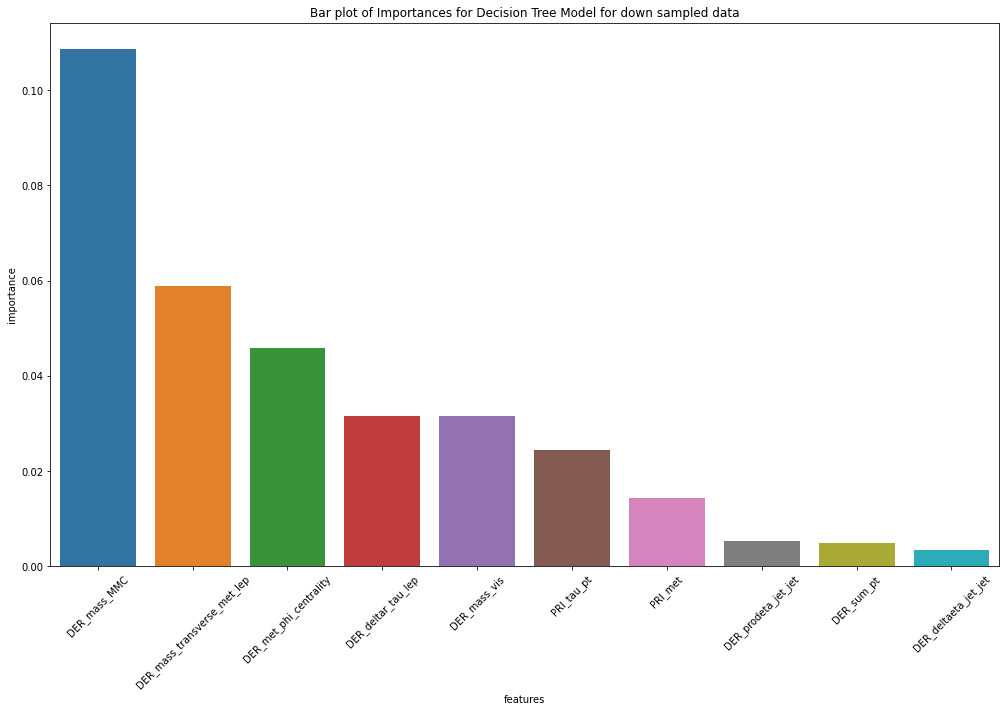

In [ ]:
def permutation_imp(model, imp_features, imp, impstd = 0):
    return pd.DataFrame({'features':imp_features, 'importance':imp, 'importance_std': impstd}
                       ).sort_values('importance', ascending=False)
features_imp =permutation_importance(dt_down, x_val, y_val)
imp_feature_df = permutation_imp(dt_down,list(x_train.columns),features_imp['importances_mean'],features_imp['importances_std']).iloc[:10]
fig,ax=plt.subplots(figsize=(17,10))
sns.barplot(data=imp_feature_df,x='features',y='importance',label='Decision tree importance',ax=ax)
plt.xticks(rotation='45')
plt.title("Bar plot of Importances for Decision Tree Model for down sampled data")

# The Ensemble Models
# Random Forest 
1. Vanilla Random Forest

In [ ]:

random_forest = RandomForestClassifier(n_estimators = 10,random_state = 44)

# Fit the model on the training set
# tried depth from 1,2, 3, 4, .....14 but got 14 
parameters = [ 14,15,16,17,18,19]
param_grid = { 'criterion':['gini'],'max_depth': parameters, 'min_samples_leaf': [3, 4, 5, 6, 7]}
best = best_classifier(random_forest, param_grid,x_train, y_train, n_folds = 5, scoring = "f1")
print(best)

BEST {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 6} 0.74
RandomForestClassifier(max_depth=17, min_samples_leaf=6, n_estimators=10,
                       random_state=44)


In [ ]:
random_forest = RandomForestClassifier(criterion = 'gini', n_estimators = 100, max_depth = 17 , min_samples_leaf = 6,  random_state = 44)

random_forest.fit(x_train, y_train)

y_pred_rf = random_forest.predict(x_val)
cm_test_rf = confusion_matrix(y_val, y_pred_rf)

f_score_rf = f1_score(y_val, y_pred_rf)

recall_rf = (cm_test_rf[1][1])/cm_test_rf.sum(axis=1)[1]

print(f'Accuracy for test set for Random Forest Classifier = {(cm_test_rf[0][0] + cm_test_rf[1][1])/len(y_val):.4f}')
print(f'Accuracy for TPR/recall for Random Forest Classifier= {recall_rf:.4f}')
print(f'F1 score : {f_score_rf} ')

NameError: ignored

In [ ]:
y_val_i = y_val.values.tolist()
ams_rf = evaluation(y_val_i, y_pred_rf, weights)
print(f"The AMS value from Random Forest: {ams_rf}")

The AMS value from Random Forest: 1.2927120009469264


Text(0.5, 1.0, 'Bar plot of Importances for Random Forest Model')

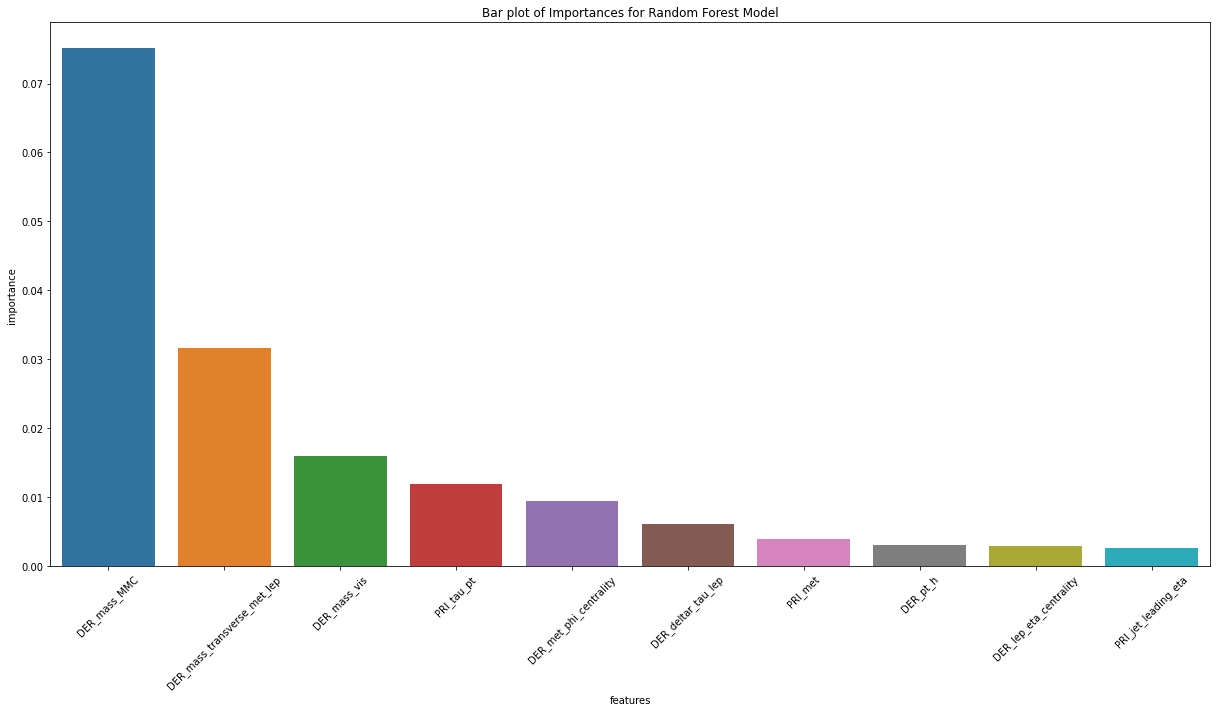

In [ ]:
def permutation_imp(model, imp_features, imp, impstd = 0):
    return pd.DataFrame({'features':imp_features, 'importance':imp, 'importance_std': impstd}
                       ).sort_values('importance', ascending=False)
features_imp =permutation_importance(random_forest, x_val, y_val)
imp_feature_df = permutation_imp(random_forest,list(x_train.columns),features_imp['importances_mean'],features_imp['importances_std']).iloc[:10]
fig,ax=plt.subplots(figsize=(17,10))
sns.barplot(data=imp_feature_df,x='features',y='importance',label='Random forest importance',ax=ax)
plt.xticks(rotation='45')
plt.title("Bar plot of Importances for Random Forest Model")

In [ ]:

random_forest_up = RandomForestClassifier(n_estimators = 10,random_state = 44)

# Fit the model on the training set
# tried depth from 1,2, 3, 4, .....14 but got 14 
parameters = [12, 13, 14,17, 18, 19, 20]
param_grid = { 'criterion':['gini'],'max_depth': parameters, 'min_samples_leaf': [3, 4, 5, 6, 7]}
best = best_classifier(random_forest_up, param_grid,x_train_up, y_train_up, n_folds = 5, scoring = "f1")
print(best)

BEST {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3} 0.84
RandomForestClassifier(max_depth=19, min_samples_leaf=3, n_estimators=10,
                       random_state=44)


In [ ]:
random_forest_up = RandomForestClassifier(criterion = 'gini', n_estimators = 100, max_depth = 19 , min_samples_leaf = 3,  random_state = 44)

random_forest_up.fit(x_train_up, y_train_up)

y_pred_rf_up = random_forest_up.predict(x_val)
cm_test_rf_up = confusion_matrix(y_val, y_pred_rf_up)

f_score_rf_up = f1_score(y_val, y_pred_rf_up)

recall_rf_up = (cm_test_rf_up[1][1])/cm_test_rf_up.sum(axis=1)[1]

print(f'Accuracy for test set for Random Forest Classifier for up sampled data= {(cm_test_rf_up[0][0] + cm_test_rf_up[1][1])/len(y_val):.4f}')
print(f'Accuracy for TPR/recall for Random Forest Classifier for up sampled data= {recall_rf_up:.4f}')
print(f'F1 score for upsampled data : {f_score_rf_up:.4f} ')

Accuracy for test set for Random Forest Classifier for up sampled data= 0.8307
Accuracy for TPR/recall for Random Forest Classifier for up sampled data= 0.8051
F1 score for upsampled data : 0.7659 


In [ ]:
y_val_i = y_val.values.tolist()
ams_rf_up = evaluation(y_val_i, y_pred_rf_up, weights)
print(f"The AMS value from Random Forest for Up Sampled data: {ams_rf_up}")

The AMS value from Random Forest for Up Sampled data: 1.139979982483361


Text(0.5, 1.0, 'Bar plot of Importances for Random Forest Model for upsampled data')

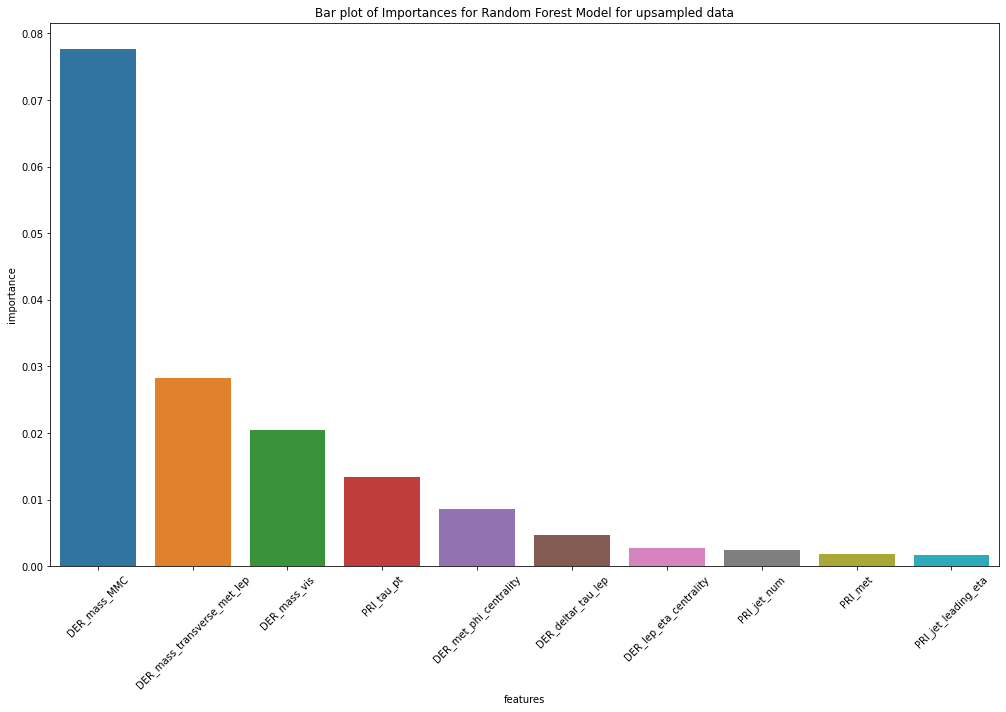

In [ ]:
def permutation_imp(model, imp_features, imp, impstd = 0):
    return pd.DataFrame({'features':imp_features, 'importance':imp, 'importance_std': impstd}
                       ).sort_values('importance', ascending=False)
features_imp =permutation_importance(random_forest_up, x_val, y_val)
imp_feature_df = permutation_imp(random_forest_up,list(x_train.columns),features_imp['importances_mean'],features_imp['importances_std']).iloc[:10]
fig,ax=plt.subplots(figsize=(17,10))
sns.barplot(data=imp_feature_df,x='features',y='importance',label='Random forest importance',ax=ax)
plt.xticks(rotation='45')
plt.title("Bar plot of Importances for Random Forest Model for upsampled data")

In [ ]:
random_forest_down = RandomForestClassifier(n_estimators = 10,random_state = 44)

# Fit the model on the training set
# tried depth from 1,2, 3, 4, .....14 but got 14 
parameters = [17, 18, 19, 20]
param_grid = { 'criterion':['gini'],'max_depth': parameters, 'min_samples_leaf': [3, 4, 5, 6, 7]}
best = best_classifier(random_forest_down, param_grid,x_train_down, y_train_down, n_folds = 5, scoring = "f1")
print(best)

BEST {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 7} 0.82
RandomForestClassifier(max_depth=18, min_samples_leaf=7, n_estimators=10,
                       random_state=44)


In [ ]:
random_forest_down = RandomForestClassifier(criterion = 'gini', n_estimators = 100, max_depth = 18 , min_samples_leaf = 7,  random_state = 44)

random_forest_down.fit(x_train_down, y_train_down)

y_pred_rf_down = random_forest_up.predict(x_val)
cm_test_rf_down = confusion_matrix(y_val, y_pred_rf_down)

f_score_rf_down = f1_score(y_val, y_pred_rf_down)

recall_rf_down = (cm_test_rf_down[1][1])/cm_test_rf_down.sum(axis=1)[1]

print(f'Accuracy for test set for Random Forest Classifier for up sampled data= {(cm_test_rf_down[0][0] + cm_test_rf_down[1][1])/len(y_val):.4f}')
print(f'Accuracy for TPR/recall for Random Forest Classifier for up sampled data= {recall_rf_down:.4f}')
print(f'F1 score for upsampled data : {f_score_rf_down:.4f} ')

Accuracy for test set for Random Forest Classifier for up sampled data= 0.8307
Accuracy for TPR/recall for Random Forest Classifier for up sampled data= 0.8051
F1 score for upsampled data : 0.7659 


In [ ]:
y_val_i = y_val.values.tolist()
ams_rf_down = evaluation(y_val_i, y_pred_rf_down, weights)
print(f"The AMS value from Random Forest for Up Sampled data: {ams_rf_down}")

The AMS value from Random Forest for Up Sampled data: 1.139979982483361


Text(0.5, 1.0, 'Bar plot of Importances for Random Forest Model for down sampled data')

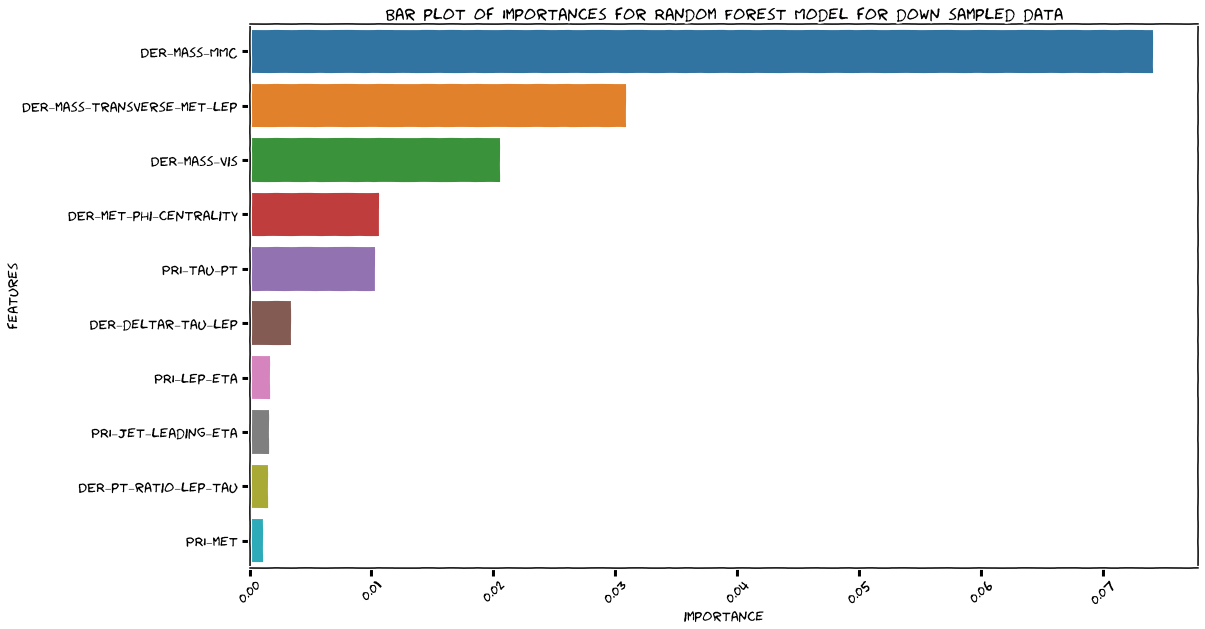

In [ ]:
def permutation_imp(model, imp_features, imp, impstd = 0):
    return pd.DataFrame({'features':imp_features, 'importance':imp, 'importance_std': impstd}
                       ).sort_values('importance', ascending=False)
features_imp =permutation_importance(random_forest_down, x_val, y_val)
imp_feature_df = permutation_imp(random_forest_down,list(x_train.columns),features_imp['importances_mean'],features_imp['importances_std']).iloc[:10]
fig,ax=plt.subplots(figsize=(17,10))
sns.barplot(data=imp_feature_df,y='features',x='importance',label='Random forest importance',ax=ax)
plt.xticks(rotation='45')
plt.title("Bar plot of Importances for Random Forest Model for down sampled data")

In [ ]:
logreg_auc = roc_auc_score(y_val,y_pred_logreg)
logreg_up_auc = roc_auc_score(y_val,y_pred_logreg_up)
logreg_down_auc = roc_auc_score(y_val,y_pred_logreg_down)

dt_auc = roc_auc_score(y_val,y_pred_dt)
dt_up_auc = roc_auc_score(y_val,y_pred_dt_up)
dt_down_auc = roc_auc_score(y_val,y_pred_dt_down)

rf_auc = roc_auc_score(y_val,y_pred_rf)
rf_up_auc = roc_auc_score(y_val,y_pred_rf_up)
rf_down_auc = roc_auc_score(y_val,y_pred_rf_down)

In [ ]:
def plot_roc(test,logprobs,logprobs_up, logprobs_down, dtprobs, dtprobs_up, dtprobs_down, rfprobs, rfprobs_up, rfprobs_down,axis):
    log_fpr, log_tpr, log_thresholds = roc_curve(test, logprobs)
    log_up_fpr, log_up_tpr, log_up_thresholds = roc_curve(test, logprobs_up)
    log_down_fpr, log_down_tpr, log_down_thresholds = roc_curve(test, logprobs_down)

    dt_fpr, dt_tpr, dt_thresholds = roc_curve(test, dtprobs)
    dt_up_fpr, dt_up_tpr, dt_up_thresholds = roc_curve(test, dtprobs_up)
    dt_down_fpr, dt_down_tpr, dt_down_thresholds = roc_curve(test, dtprobs_down)
    
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(test, rfprobs)
    rf_up_fpr, rf_up_tpr, rf_up_thresholds = roc_curve(test, rfprobs_up)
    rf_down_fpr, rf_down_tpr, rf_down_thresholds = roc_curve(test, rfprobs_down)
    
    ax.plot(log_fpr, log_tpr, label=f'Logistic Regression (area = {logreg_auc:.2f})')
    ax.plot(log_up_fpr, log_up_tpr, label=f'Logistic Regression Upsampled (area = {logreg_up_auc:.2f})')
    ax.plot(log_down_fpr, log_down_tpr, label=f'Logistic Regression Undersampled(area = {logreg_down_auc:.2f})')
    
    ax.plot(dt_fpr, dt_tpr, label=f'Decision Tree (area = {dt_auc:.2f})')
    ax.plot(dt_up_fpr, dt_up_tpr, label=f'Decision Tree  Upsampled (area = {dt_up_auc:.2f})')
    ax.plot(dt_down_fpr, dt_down_tpr, label=f'Decision Tree Undersampled(area = {dt_down_auc:.2f})')

    ax.plot(rf_fpr, rf_tpr, label=f'Random Forest (area = {rf_auc:.2f})')
    ax.plot(rf_up_fpr, rf_up_tpr, label=f'Random Forest Upsampled (area = {rf_up_auc:.2f})')
    ax.plot(rf_down_fpr, rf_down_tpr, label=f'Random Forest Undersampled(area = {rf_down_auc:.2f})')

    #ax.plot(kfpr, ktpr, label=f'KNN (area = {knnreg_auc:.2f})', color = 'g')  
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.4,
    )
   
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve for Improving F1 score')
    ax.legend(loc="lower right",fontsize=8)

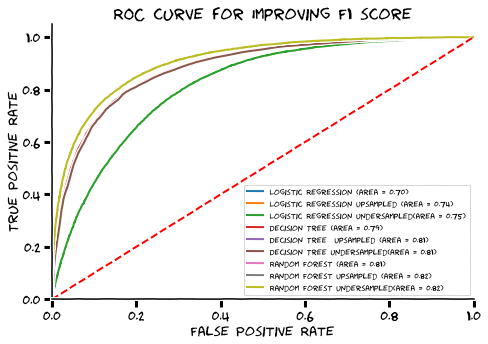

In [ ]:
plt.xkcd(randomness=0,scale=0.1)
y_probs_log = logreg.predict_proba(x_val)[:,1]
y_probs_log_up = logreg_up.predict_proba(x_val)[:,1]
y_probs_log_down = logreg_down.predict_proba(x_val)[:,1]
y_probs_dt = dt.predict_proba(x_val)[:,1]
y_probs_dt_up = dt_up.predict_proba(x_val)[:,1]
y_probs_dt_down = dt_down.predict_proba(x_val)[:,1]
y_probs_rf = random_forest.predict_proba(x_val)[:,1]
y_probs_rf_up = random_forest_up.predict_proba(x_val)[:,1]
y_probs_rf_down = random_forest_down.predict_proba(x_val)[:,1]

#y_kprobs = knnreg.predict_proba(X_test)[:,1]
fig, ax = plt.subplots(figsize = (7,5))
fig.patch.set_facecolor('None')
fig.patch.set_alpha(0)
plot_roc(y_val,y_probs_log,y_probs_log_up,y_probs_log_down,y_probs_dt,y_probs_dt_up,y_probs_dt_down,y_probs_rf,y_probs_rf_up,y_probs_rf_down,ax)
[ax.spines[key].set_visible(False) for key in ax.spines.keys() if key not in ['bottom','left']];
ax.patch.set_facecolor('None')
ax.patch.set_alpha(0)
plt.tight_layout()

In [ ]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ["Strategy","Recall", "F1 Score","AUC score", "AMS"]
pt.add_row(["Logistic Regression - No imbalance correction",round(recall_logreg,4), round(f_score_logreg,4),round(logreg_auc,4), round(ams_logreg,4)])
pt.add_row(["Logistic Regression - Upsampling",round(recall_logreg_up,4), round(f_score_logreg_up,4),round(logreg_up_auc,4), round(ams_logreg_up,4)])
pt.add_row(["Logistic Regression - Downsampling",round(recall_logreg_down,4), round(f_score_logreg_down,4),round(logreg_down_auc,4),round(ams_logreg_down,4)])
print(pt)


+-----------------------------------------------+--------+----------+-----------+--------+
|                    Strategy                   | Recall | F1 Score | AUC score |  AMS   |
+-----------------------------------------------+--------+----------+-----------+--------+
| Logistic Regression - No imbalance correction | 0.5333 |  0.5946  |   0.6983  | 0.8745 |
|        Logistic Regression - Upsampling       | 0.7642 |  0.6676  |   0.7444  | 0.8875 |
|       Logistic Regression - Downsampling      | 0.7702 |  0.6685  |   0.745   | 0.8901 |
+-----------------------------------------------+--------+----------+-----------+--------+


In [ ]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ["Strategy","Recall", "F1 Score","AUC score", "AMS"]
pt.add_row(["Decision Tree - No imbalance correction",round(recall_dt,4), round(f_score_dt,4),round(dt_auc,4), round(ams_dt,4)])
pt.add_row(["Decision Tree - Upsampling",round(recall_dt_up,4), round(f_score_dt_up,4),round(dt_up_auc,4), round(ams_dt_up,4)])
pt.add_row(["Decision Tree - Downsampling",round(recall_dt_down,4), round(f_score_dt_down,4),round(dt_down_auc,4),round(ams_dt_down,4)])
print(pt)

+-----------------------------------------+--------+----------+-----------+--------+
|                 Strategy                | Recall | F1 Score | AUC score |  AMS   |
+-----------------------------------------+--------+----------+-----------+--------+
| Decision Tree - No imbalance correction | 0.7033 |  0.7316  |   0.7941  | 1.1572 |
|        Decision Tree - Upsampling       | 0.8003 |  0.7426  |   0.807   | 1.0342 |
|       Decision Tree - Downsampling      | 0.8076 |  0.7405  |   0.8058  | 1.0181 |
+-----------------------------------------+--------+----------+-----------+--------+


In [ ]:
pt = PrettyTable()
pt.field_names = ["Strategy","Recall", "F1 Score","AUC score", "AMS"]
pt.add_row(["Random Forest - No imbalance correction",round(recall_rf,4), round(f_score_rf,4),round(rf_auc,4), round(ams_rf,4)])
pt.add_row(["Random Forest - Upsampling",round(recall_rf_up,4), round(f_score_rf_up,4),round(rf_up_auc,4), round(ams_rf_up,4)])
pt.add_row(["Random Forest - Downsampling",round(recall_rf_down,4), round(f_score_rf_down,4),round(rf_down_auc,4),round(ams_rf_down,4)])
print(pt)

+-----------------------------------------+--------+----------+-----------+--------+
|                 Strategy                | Recall | F1 Score | AUC score |  AMS   |
+-----------------------------------------+--------+----------+-----------+--------+
| Random Forest - No imbalance correction | 0.7097 |  0.7513  |   0.8078  | 1.2927 |
|        Random Forest - Upsampling       | 0.8051 |  0.7659  |   0.8246  |  1.14  |
|       Random Forest - Downsampling      | 0.8051 |  0.7659  |   0.8246  |  1.14  |
+-----------------------------------------+--------+----------+-----------+--------+
